In [1]:
cd /mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point/

/mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point


/home/zhangyiyuan/intel/intelpython3/envs/bmtk_nest/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Run Allen V1 model

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import h5py
import glob
from scipy import signal
from numba import jit, prange
from tqdm import tqdm

from bmtk.analyzer.spike_trains import plot_rates_boxplot, plot_rates, plot_raster
from bmtk.utils import sonata
from bmtk.utils.reports import SpikeTrains
from bmtk.simulator import pointnet
from bmtk.simulator.pointnet.pyfunction_cache import synaptic_weight
from bmtk.simulator.pointnet.io_tools import io

import nest


try:
    nest.Install('glifmodule')
except Exception as e:
    pass


pd.set_option('display.max_rows', None)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: May  5 2025 12:51:05

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [5]:
# 产生bkg输入
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

psg = PoissonSpikeGenerator()
psg.add(node_ids='network/bkg_nodes.h5', firing_rate=1000.0, times=(0.0, 0.5), population='bkg')
psg.to_sonata('inputs/spikes_0.5s_1000fr.bkg.h5')

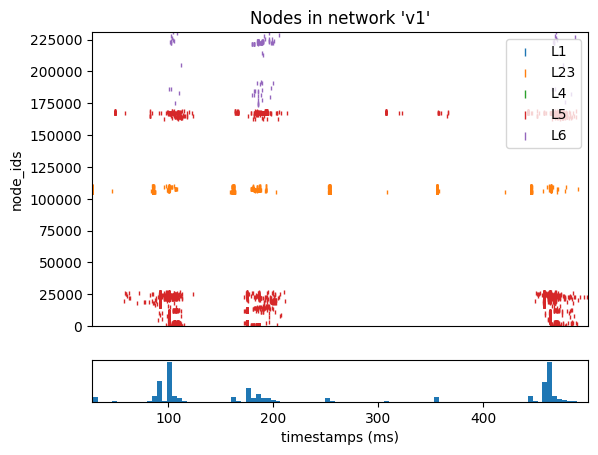

In [ ]:
# 绘制Allen V1的spike trains
_ = plot_raster(spikes_file='/mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point/output_bkg_1000Hz/spikes_resting_0.5s_1000fr.h5',
                nodes_file='/mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point/network/v1_nodes.h5',
                node_types_file='/mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point/network/v1_node_types.csv',
                group_by='layer')

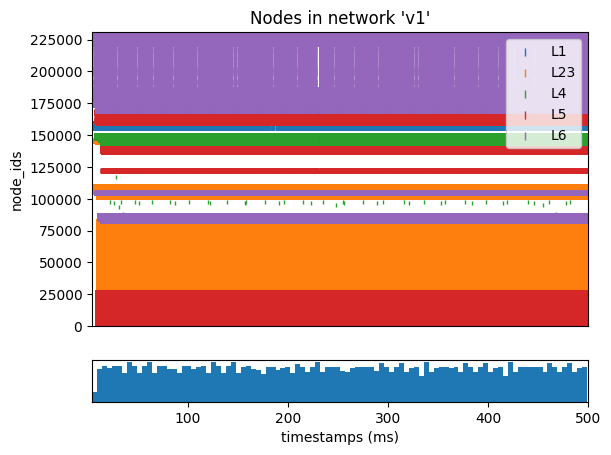

In [ ]:
# 绘制Chen V1的spike trains
_ = plot_raster(spikes_file='/mnt/d/MICrONS/Training-data-driven-V1-model-test/Chen_package_test/simulation_results.h5',
                nodes_file='/mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point/network/v1_nodes.h5',
                node_types_file='/mnt/d/MICrONS/Allen_V1/2020_V1/simulations/v1_point/network/v1_node_types.csv',
                group_by='layer')